In [3]:
import pandas as pd
import numpy as np
from scipy import random
import seaborn as sns
import math
from math import ceil

from scipy import stats
import statsmodels.api as sm 
#import statsmodels.stats.api as sms
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mtick

import itertools
%matplotlib inline

# Load and Explore Data


In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
# Drop the unnamed column
boston_df = boston_df.drop(boston_df.columns[0], axis=1)

In [9]:
# Review the data types 
boston_df.dtypes

ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
# Check the basic metrics of the dataset 
boston_df.describe()

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


# Data Visualization
1. For the "Median value of owner-occupied homes" provide a boxplot
2. Provide a histogram for the Charles river variable
3. Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
4. Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
5. Create a histogram for the pupil to teacher ratio variable

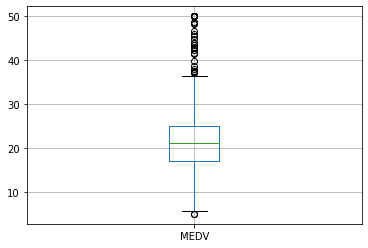

In [11]:
# For the "Median value of owner-occupied homes" provide a boxplot
boxplot = boston_df.boxplot(column=['MEDV'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac3bb8cd0>]],
      dtype=object)

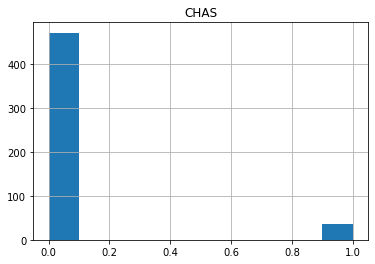

In [12]:
# Provide a histogram for the Charles river variable
boston_df.hist(column='CHAS')
# This is a dummy variable and I don't think histogram is the best way to visualize it.

In [13]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
# Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.
boston_df.loc[(boston_df.AGE <= 35),  'AgeGroup'] = '35_Years_Younger'
boston_df.loc[(boston_df.AGE > 35) & (boston_df.AGE < 70),  'AgeGroup'] = '35_and_70'
boston_df.loc[(boston_df.AGE >=70),  'AgeGroup'] = '70_Years_Older'

In [14]:
boston_df.groupby("AgeGroup")["MEDV"].mean()

AgeGroup
35_Years_Younger    27.775824
35_and_70           24.947656
70_Years_Older      19.793380
Name: MEDV, dtype: float64

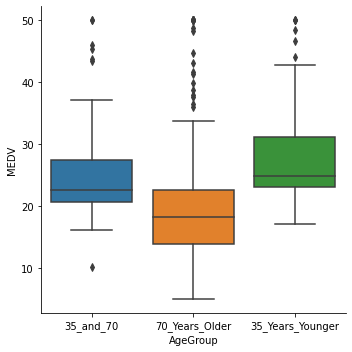

In [15]:
sns.catplot(x="AgeGroup", y="MEDV", kind="box", data=boston_df);

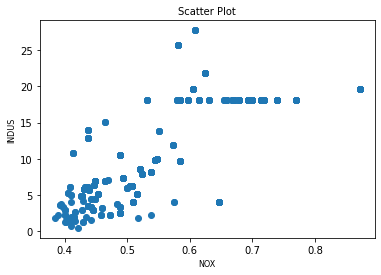

In [35]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations 
#and the proportion of non-retail business acres per town. 
#What can you say about the relationship?
plt.title("Scatter Plot", fontsize=10)
plt.xlabel("NOX", fontsize=8)
plt.ylabel("INDUS", fontsize=8)
plt.scatter(boston_df.NOX, boston_df.INDUS)

## Generally speaking, Nitric oxide concentrations and the proportion of non-retail business acres per town are positively correlated. While the Nitric Oxide Concentrations increased, the non-retail business acres per town increased.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ac39af090>]],
      dtype=object)

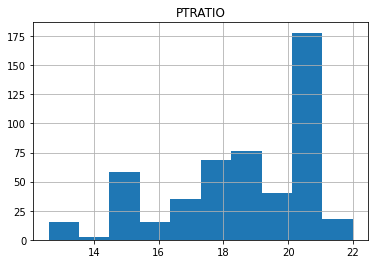

In [17]:
# Create a histogram for the pupil to teacher ratio variable
boston_df.hist(column='PTRATIO')

# Statistical Analysis
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
## Make sure to:

1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

# Charles River Variable vs. Median Value of Houses
* H0: therea is no significant difference in median value of houses bounded by the Charles river or not.
* Method: t-test
* Conclusion: p < 0.05, rejecting the H0. There is a significant difference in median value of houses bounded by the Charles river or not.

In [19]:
stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 1],
                boston_df['MEDV'][boston_df['CHAS'] == 0])

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

# House Age vs. Median Value of Houses
* H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
* Testing Method: ANOVA 
* Conclustion: p < 0.05, rejecting the H0. There is a statistical significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

In [20]:
scipy.stats.levene(boston_df[boston_df['AgeGroup'] == '35_Years_Younger']['MEDV'],
                   boston_df[boston_df['AgeGroup'] == '35_and_70']['MEDV'], 
                   boston_df[boston_df['AgeGroup'] == '70_Years_Older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [25]:
thirtyfive_lower_medv = boston_df[boston_df['AgeGroup'] == '35_Years_Younger']['MEDV']
thirtyfive_seventy_medv = boston_df[boston_df['AgeGroup'] == '35_and_70']['MEDV']
seventy_older_medv = boston_df[boston_df['AgeGroup'] == '70_Years_Older']['MEDV']

In [27]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower_medv, thirtyfive_seventy_medv, seventy_older_medv)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


# Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres per Town
* H0:there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
* Testing Method: Pearson Correlation
* Conclusion: p-value < 0.05, we reject the Null Hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [28]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])

(-0.4273207723732826, 7.065041586251507e-24)

# Additional Weighted Distance to Employment Centres vs. Median Value of Houses
* H0: Additional weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes.
* Method: Regression analysis
* Conclusion:
*The coefficient of 4.7985 means that as the DIS variable increases by 1, the predicted value of MEDV increases by 4.7985;
* R-squared of 0.732 means that this model explains about 73% of the variance;
* p-values < 0.05, referring to that the DIS has statistically significant correlation with MEDV;
* there is a 95% confidence intervals for the DIS(meaning we predict at a 95% percent confidence that the value of DIS is between 4.545 and 5.052).

In [31]:
lm = ols('MEDV ~ DIS', data = boston_df).fit()

In [32]:
X = boston_df["DIS"]
y = boston_df["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 07 Jul 2021   Prob (F-statistic):                   1.52e-146
Time:                        19:42:02   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""